In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from src.perceptron import SimplePerceptron

## Construir Datos

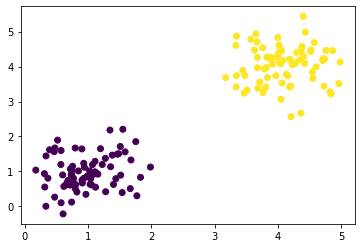

In [10]:
X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=[(1,1), (4,4)], cluster_std=0.5
)
y = [1 if i == 1 else -1 for i in y]
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### Elimino elementos fuera de rango

Removed 2 out of bounds elements


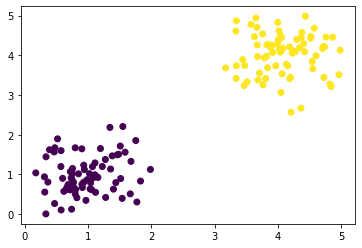

In [11]:
offenders = np.argwhere(np.any((X < 0) | (X > 5), axis=1))
X_c = np.delete(X, offenders, 0)
y_c = np.delete(y, offenders, 0)
print(f"Removed {len(offenders)} out of bounds elements")
plt.scatter(X_c[:, 0], X_c[:, 1], c=y_c)
plt.show()

## Clasificando con el perceptron simple

Pesos que minimizan el error: [0.03382237796813856, 0.004663354390421995, -0.1]


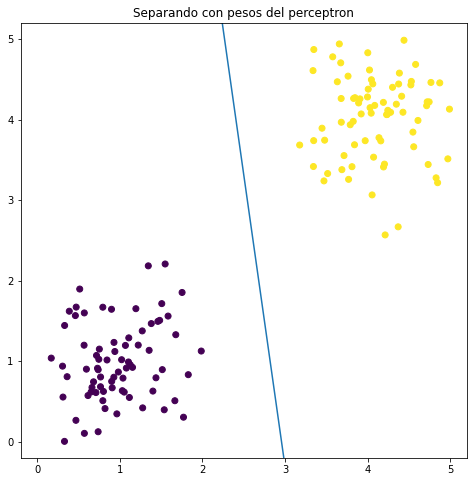

In [12]:
p = SimplePerceptron(X_c, y_c, learning_rate=0.01, limit=10000)

def visualize(x, y, w, title):
    weights = w
    _, ax = plt.subplots(figsize=(8,8))
    ax.scatter(x[:, 0], x[:, 1], marker="o", c=y)
    ax.set_title(title)

    x0_1 = np.amin(x[:, 0])
    x0_2 = np.amax(x[:, 0])
    d=0.2
    ax.set_xlim(0-d, 5+d)
    ax.set_ylim(0-d, 5+d)
    if weights[2] != 0:
        # w_y*y + w_x*x + w0 = 0
        # => y = (-w_x*x - w0) / w_y
        x1_1 = (-weights[0] * x0_1 - weights[2]) / weights[1]
        x1_2 = (-weights[0] * x0_2 - weights[2]) / weights[1]

        # two points to make an infinte line
        ax.axline((x0_1, x1_1), (x0_2, x1_2))
    plt.show()
print(f"Pesos que minimizan el error: {list(p.min_weights)}")
visualize(X_c, y_c, p.min_weights, 'Separando con pesos del perceptron')

La recta de separación **no** es óptima, ya que da resultados distintos al entrenar al perceptron con los mismos datos (por el aspecto aleatorio del entrenamiento del perceptron). Dependiendo la corrida puede quedar mas cerca de uno de los grupos, o tratar de separar a los elementos con una linea tendiendo a vertical. Teniendo en cuenta como se generan los datos, tendria sentido que el separador sea una linea similar a $y=-x+5$

## Construir datos con errores

In [14]:
# trazar una linea y=-x+5
# poner puntos perpendicularmente a esta linea a una distancia d de la linea
# clasificarlos con el valor opuesto al de los puntos del mismo lado de esa linea